In [1]:
import cv2
import os
from PIL import Image
import numpy as np
#import Augmentor
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input  
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

2024-05-01 08:47:43.249599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 08:47:43.249733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 08:47:43.387046: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
base_path = os.path.join('/kaggle/input/ultrasound/data')
dir_path = os.listdir(base_path)
dir_path.reverse()
print(dir_path)
files = []
labels = []

['malignant', 'normal', 'benign']


In [3]:
def img_preprocessing(img_path):
    img = load_img(img_path, target_size=(224, 224)) 
    img = img_to_array(img)  # Convert to NumPy array
    #img = np.expand_dims(img, axis=0)# Add a batch dimension (needed for the model)
    img = preprocess_input(img)  
    return img

In [4]:
for i, img_class in enumerate(dir_path):
    for image in os.listdir(os.path.join(base_path,img_class)):
        img_path = os.path.join(base_path,img_class,image)
        img_array = img_preprocessing(img_path)
        files.append(img_array)
        labels.append(i)

In [5]:
indices = np.arange(len(files))
np.random.shuffle(indices)
m_files = []
m_labels = []
for indice in indices:
    m_files.append(files[indice])
    m_labels.append(labels[indice])

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [7]:
x_train, x_test, y_train, y_test = train_test_split(m_files, m_labels, test_size = 0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [9]:
count_0_val = np.sum(y_val == 0)
count_1_val = np.sum(y_val == 1)
count_2_val = np.sum(y_val == 2)

count_0_train = np.sum(y_train == 0)
count_1_train = np.sum(y_train == 1)
count_2_train = np.sum(y_train == 2)

count_0_test = np.sum(y_test == 0)
count_1_test = np.sum(y_test == 1)
count_2_test = np.sum(y_test == 2)

print(count_0_val, count_1_val, count_2_val)
print(count_0_train, count_1_train, count_2_train)
print(count_0_test, count_1_test, count_2_test)

69 74 67
281 274 283
87 89 87


In [10]:
y_train_encoded = to_categorical(y_train, num_classes=3)
#print(f'1: {y_train_encoded}')
y_train_encoded = y_train_encoded.reshape(-1, 3) 
#print(f'2: {y_train_encoded}')

y_val_encoded = to_categorical(y_val, num_classes=3)
y_val_encoded = y_val_encoded.reshape(-1, 3)


#x_test = to_categorical(y_train, num_classes=3)
#y_test = to_categorical(y_train, num_classes=3)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,Activation
from tensorflow.keras.initializers import GlorotUniform, HeNormal
import matplotlib.pyplot as plt
from keras import regularizers
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.metrics import Precision, Recall
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.regularizers import l2
from keras.models import load_model
from tensorflow.keras.models import save_model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model

In [48]:
#base1 = DenseNet121(weights=None, include_top=False, input_shape=(224,224,3))
#base1.load_weights("/kaggle/input/chexnet-keras-weights/brucechou1983_CheXNet_Keras_0.3.0_weights.h5", by_name=True, skip_mismatch=True)
#base1.load_weights("/kaggle/input/radimagenet-densenet121/RadImageNet-DenseNet121_notop.h5")

#base1 = InceptionV3(weights=None, include_top=False, input_shape=(224,224,3))
#base1.load_weights("/kaggle/input/radimagenet-inceptionv3/RadImageNet-InceptionV3_notop.h5")

#base1 = InceptionResNetV2(weights=None, include_top=False, input_shape=(224,224,3))
#base1.load_weights("/kaggle/input/radimagenet-irv2/RadImageNet-IRV2_notop.h5")
#base1.trainable = False

base1 = ResNet50(weights=None, include_top=False, input_shape=(224,224,3))
base1.load_weights("/kaggle/input/radimagenet-resnet50-notop/RadImageNet-ResNet50_notop.h5")
base1.trainable = False

In [49]:
base1.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [37]:
base1.trainable = True

set_trainable = False

for layer in base1.layers:
    if layer.name in ['conv2d_93']:
        layer.trainable = True
    else:
        layer.trainable = False          

<KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_878>
<KerasTensor shape=(None, 50176), dtype=float32, sparse=False, name=keras_tensor_879>
<KerasTensor shape=(None, 51200), dtype=float32, sparse=False, name=keras_tensor_880>
<KerasTensor shape=(None, 51200), dtype=float32, sparse=False, name=keras_tensor_881>

In [22]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(3, activation='softmax')(z)

model1 = Model(inputs, outputs)

model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=10, batch_size=30) 

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 670ms/step - accuracy: 0.3425 - loss: 3.8039 - val_accuracy: 0.3952 - val_loss: 1.5262
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4180 - loss: 1.3845 - val_accuracy: 0.4238 - val_loss: 1.6527
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4693 - loss: 1.1749 - val_accuracy: 0.5524 - val_loss: 1.0458
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5055 - loss: 1.0586 - val_accuracy: 0.4333 - val_loss: 1.3886
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5180 - loss: 1.0935 - val_accuracy: 0.5762 - val_loss: 0.9220
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6047 - loss: 0.8921 - val_accuracy: 0.6000 - val_loss: 0.8705
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5915 - loss: 0.8177 - val_accuracy: 0.5095 - val_loss: 0.9920
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5932 - loss: 0.9046 - val_accuracy: 0.6571 -

In [23]:
model1.save('chex_121.h5')

In [31]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(3, activation='softmax')(z)

model2 = Model(inputs, outputs)

model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=10, batch_size=40) 

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4007 - loss: 7.3421 - val_accuracy: 0.6048 - val_loss: 2.0605
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.6314 - loss: 2.2115 - val_accuracy: 0.7190 - val_loss: 1.4085
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.8353 - loss: 0.5730 - val_accuracy: 0.7333 - val_loss: 1.3166
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.8738 - loss: 0.3594 - val_accuracy: 0.7190 - val_loss: 1.3127
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9103 - loss: 0.2783 - val_accuracy: 0.7429 - val_loss: 1.2134
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.8987 - loss: 0.2451 - val_accuracy: 0.7286 - val_loss: 1.1861
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9416 - loss: 0.1913 - val_accuracy: 0.7381 - val_loss: 1.3048
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.9686 - loss: 0.1468 - val_accuracy: 0.7143 - va

In [32]:
model2.save('Rad_121.h5')

In [40]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(3, activation='softmax')(z)

model3 = Model(inputs, outputs)

model3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=10, batch_size=35) 

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 36s 785ms/step - accuracy: 0.4531 - loss: 1.5290 - val_accuracy: 0.6571 - val_loss: 0.7846
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7010 - loss: 0.7330 - val_accuracy: 0.6810 - val_loss: 0.7729
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7914 - loss: 0.4967 - val_accuracy: 0.7333 - val_loss: 0.6729
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8533 - loss: 0.3960 - val_accuracy: 0.6952 - val_loss: 0.7008
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8782 - loss: 0.3670 - val_accuracy: 0.7429 - val_loss: 0.6960
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8413 - loss: 0.4079 - val_accuracy: 0.7381 - val_loss: 0.6650
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8898 - loss: 0.3025 - val_accuracy: 0.7429 - val_loss: 0.7058
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9388 - loss: 0.2420 - val_accuracy: 0.7524 -

In [41]:
model3.save('Rad_V3.h5')

In [46]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(3, activation='softmax')(z)

model4 = Model(inputs, outputs)

model4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=10, batch_size=40) 

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4590 - loss: 2.1555 - val_accuracy: 0.6571 - val_loss: 0.9308
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.7327 - loss: 0.7733 - val_accuracy: 0.7381 - val_loss: 0.8444
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.8127 - loss: 0.4275 - val_accuracy: 0.7429 - val_loss: 0.6892
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.8858 - loss: 0.2595 - val_accuracy: 0.7952 - val_loss: 0.5491
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.9553 - loss: 0.1519 - val_accuracy: 0.7762 - val_loss: 0.5825
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9741 - loss: 0.1031 - val_accuracy: 0.8048 - val_loss: 0.5624
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9859 - loss: 0.0878 - val_accuracy: 0.8095 - val_loss: 0.5566
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9935 - loss: 0.0615 - val_accuracy: 0.79

In [47]:
model4.save('Rad_IRV2.h5')

In [52]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(3, activation='softmax')(z)

model5 = Model(inputs, outputs)

model5.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=8, batch_size=50) 

Epoch 1/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 600ms/step - accuracy: 0.4766 - loss: 2.2891 - val_accuracy: 0.6095 - val_loss: 1.5593
Epoch 2/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.7977 - loss: 0.7458 - val_accuracy: 0.7286 - val_loss: 1.9025
Epoch 3/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9271 - loss: 0.2969 - val_accuracy: 0.7762 - val_loss: 0.9599
Epoch 4/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9741 - loss: 0.1076 - val_accuracy: 0.7143 - val_loss: 1.6481
Epoch 5/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9843 - loss: 0.0842 - val_accuracy: 0.7714 - val_loss: 0.9898
Epoch 6/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9904 - loss: 0.0359 - val_accuracy: 0.7333 - val_loss: 1.1850
Epoch 7/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9907 - loss: 0.0259 - val_accuracy: 0.7571 - val_loss: 1.3931
Epoch 8/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9866 - loss: 0.0342 - val_accuracy: 0.7810 - val_los

In [53]:
model5.save('Rad_50.h5')

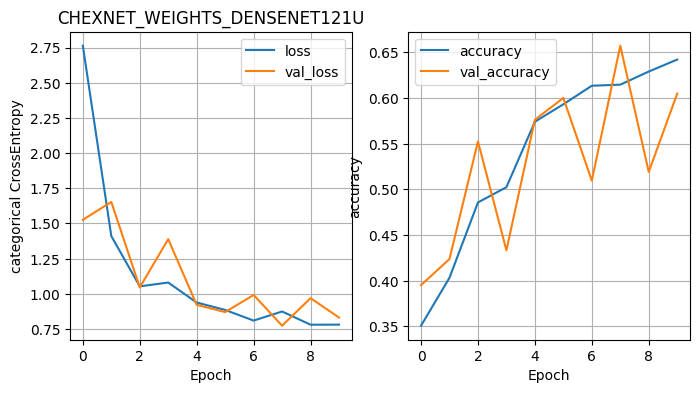

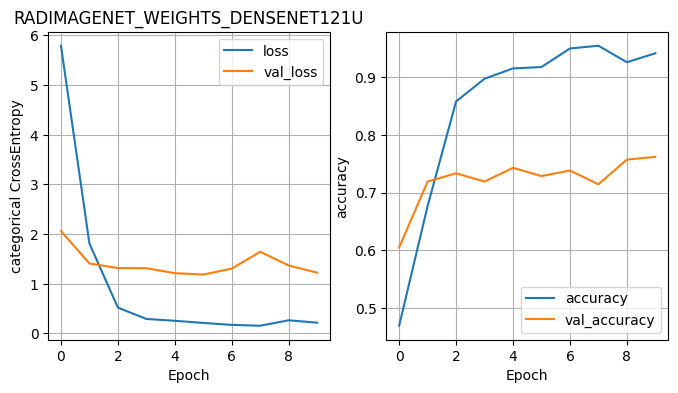

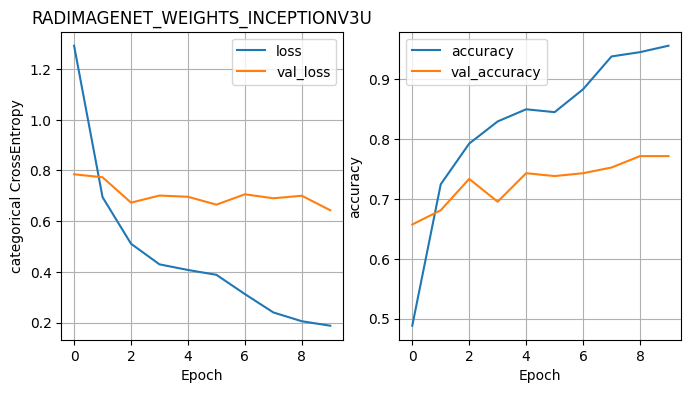

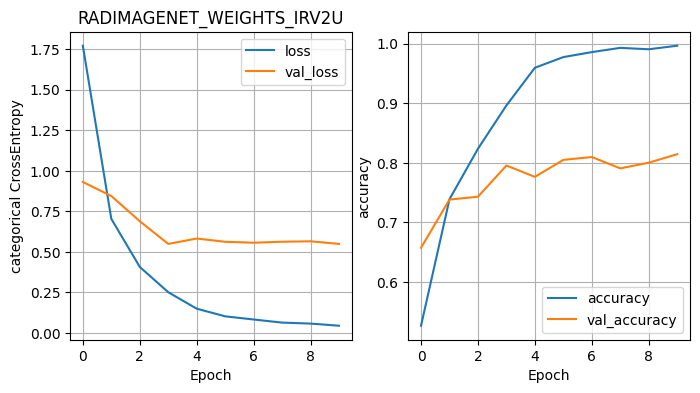

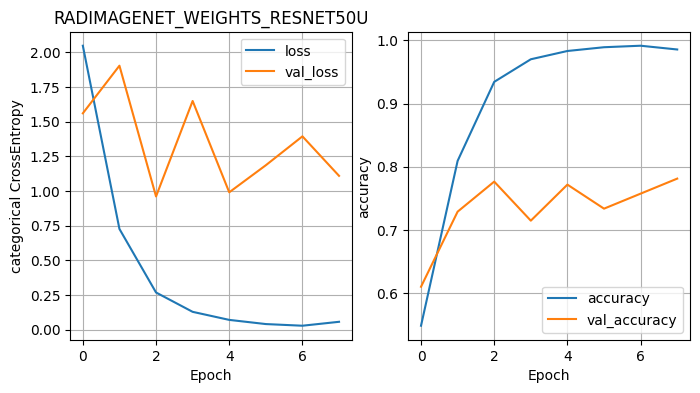

In [54]:
def plot_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('categorical CrossEntropy')
    ax1.legend() 
    ax1.grid(True)
    ax1.set_title(title)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

plot_history(history1,'CHEXNET_WEIGHTS_DENSENET121U')
plot_history(history2,'RADIMAGENET_WEIGHTS_DENSENET121U')
plot_history(history3,'RADIMAGENET_WEIGHTS_INCEPTIONV3U')
plot_history(history4,'RADIMAGENET_WEIGHTS_IRV2U')
plot_history(history5,'RADIMAGENET_WEIGHTS_RESNET50U')

In [55]:
from sklearn.metrics import classification_report

# Assuming y_test is the true labels and x_test is the test data

models = [model1, model2, model3, model4, model5]  # Assuming model1, model2, and model3 are your three models
model_names = ['CHEXNET_WEIGHTS_DENSENET_121U', 'RADIMAGENET_WEIGHTS_DENSENET_121U','RADIMAGENET_WEIGHTS_INCEPTIONV3U','RADIMAGENET_WEIGHTS_IRV2U','RADIMAGENET_WEIGHTS_RESNET50U' ]

for model, name in zip(models, model_names):
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5).astype(int)
    y_pred = np.argmax(y_pred, axis=1)

    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print()

9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step
Classification Report for CHEXNET_WEIGHTS_DENSENET_121U:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        87
           1       0.75      0.45      0.56        89
           2       0.55      0.87      0.67        87

    accuracy                           0.60       263
   macro avg       0.63      0.60      0.58       263
weighted avg       0.63      0.60      0.58       263


9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
Classification Report for RADIMAGENET_WEIGHTS_DENSENET_121U:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        87
           1       0.77      0.81      0.79        89
           2       0.78      0.62      0.69        87

    accuracy                           0.75       263
   macro avg       0.76      0.75      0.75       263
weighted avg       0.76      0.75      0.75       263


9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
Classif